In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

In [2]:
data = pd.read_csv("./datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv").dropna()
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
print(np.sort(data["MTRANS"].unique()))

['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


In [3]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
yLabelEncoder = LabelEncoder()
Y = yLabelEncoder.fit_transform(Y)
sortedClasses = data["NObeyesdad"].unique()
print(np.sort(sortedClasses))

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [4]:
Y

array([1, 1, 1, ..., 4, 4, 4])

In [26]:
data["encoded"] = Y
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,encoded
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,5
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,4
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,4
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,4
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,4


In [5]:
print(X[0:5])

[['Female' 21.0 1.62 64.0 'yes' 'no' 2.0 3.0 'Sometimes' 'no' 2.0 'no'
  0.0 1.0 'no' 'Public_Transportation']
 ['Female' 21.0 1.52 56.0 'yes' 'no' 3.0 3.0 'Sometimes' 'yes' 3.0 'yes'
  3.0 0.0 'Sometimes' 'Public_Transportation']
 ['Male' 23.0 1.8 77.0 'yes' 'no' 2.0 3.0 'Sometimes' 'no' 2.0 'no' 2.0
  1.0 'Frequently' 'Public_Transportation']
 ['Male' 27.0 1.8 87.0 'no' 'no' 3.0 3.0 'Sometimes' 'no' 2.0 'no' 2.0
  0.0 'Frequently' 'Walking']
 ['Male' 22.0 1.78 89.8 'no' 'no' 2.0 1.0 'Sometimes' 'no' 2.0 'no' 0.0
  0.0 'Sometimes' 'Public_Transportation']]


In [6]:
data.head()
# 0    1    2      3                       4   5    6    7       8     9    10   11  12  13     14            15         16    

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
labencoder = LabelEncoder()

X[:, 0] = labencoder.fit_transform(X[:, 0])
X[:, 4] = labencoder.fit_transform(X[:, 4])
X[:, 5] = labencoder.fit_transform(X[:, 5])
# X[:, 8] = labencoder.fit_transform(X[:, 8])
X[:, 9] = labencoder.fit_transform(X[:, 9])
X[:, 11] = labencoder.fit_transform(X[:, 11])
# X[:, 14] = labencoder.fit_transform(X[:, 14])
X[:, 15] = labencoder.fit_transform(X[:, 15])
X

array([[0, 21.0, 1.62, ..., 1.0, 'no', 3],
       [0, 21.0, 1.52, ..., 0.0, 'Sometimes', 3],
       [1, 23.0, 1.8, ..., 1.0, 'Frequently', 3],
       ...,
       [0, 22.524036, 1.752206, ..., 0.646288, 'Sometimes', 3],
       [0, 24.361936, 1.73945, ..., 0.586035, 'Sometimes', 3],
       [0, 23.664709, 1.738836, ..., 0.714137, 'Sometimes', 3]],
      dtype=object)

In [6]:
mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 4}

X[:, 8] = np.array([mapping[value] for value in X[:, 8]])
X[:, 14] = np.array([mapping[value] for value in X[:, 14]])

In [61]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# xct = ColumnTransformer([('one_hot_encode', OneHotEncoder(categories='auto'), [0, 15])],remainder='passthrough')
# X = xct.fit_transform(X)
# print(X)
# print(X.shape)

[[1.0 0.0 0.0 ... 0.0 1.0 0]
 [1.0 0.0 0.0 ... 3.0 0.0 1]
 [0.0 1.0 0.0 ... 2.0 1.0 2]
 ...
 [1.0 0.0 0.0 ... 1.414209 0.646288 1]
 [1.0 0.0 0.0 ... 1.139107 0.586035 1]
 [1.0 0.0 0.0 ... 1.026452 0.714137 1]]
(2111, 21)


In [10]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
xct = ColumnTransformer([('one_hot_encode', OneHotEncoder(categories='auto'), [0, 4, 5, 8, 9, 11, 14, 15])],remainder='passthrough')
X = xct.fit_transform(X)
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 0.0 1.0 0]
 [1.0 0.0 0.0 ... 3.0 0.0 1]
 [0.0 1.0 0.0 ... 2.0 1.0 2]
 ...
 [1.0 0.0 0.0 ... 1.414209 0.646288 1]
 [1.0 0.0 0.0 ... 1.139107 0.586035 1]
 [1.0 0.0 0.0 ... 1.026452 0.714137 1]]
(2111, 25)


In [9]:
type(X[152])

numpy.ndarray

In [7]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xScale.fit(X)

StandardScaler()

In [8]:
import pickle

with open('D:/College Stuff/Semester 6/Homework/Data Mining & Analysis/mlproject/notebooks/xscaler.pkl', 'wb') as file:
    pickle.dump(xScale, file)

In [9]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size=0.8, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xScale.fit(X)
xTrain = xScale.transform(xTrain)
xTest = xScale.transform(xTest)

In [11]:
xTrain[0]

array([-1.01191369, -0.52212439, -0.76838835, -1.01531759,  0.47229133,
        0.36234913,  1.08834176,  0.40415272,  4.88026997,  6.85399684,
       -0.01307326, -0.21827203,  1.16382038, -1.08062463,  0.51769067,
        0.50333674])

# Classifier

In [12]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [13]:
baseClassifiers = [
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=150, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42))
]

staxifier = StackingClassifier(
    estimators = baseClassifiers,
    final_estimator=XGBClassifier(n_estimators=100, random_state=42),
    stack_method = 'auto',
    n_jobs = -1
)

staxifier.fit(xTrain, yTrain)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=150,
                                                       random_state=42)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=150,
                                                     random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt',
                                DecisionTreeClassifier(class_weig...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...),
                   n_jobs=-1)

In [14]:
# without one hot
predictions = staxifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
presicion = precision_score(yTest, predictions, average='macro')
recall = recall_score(yTest, predictions, average='macro')
f1Score = f1_score(yTest, predictions, average='macro')
confusionMatrix = confusion_matrix(yTest, predictions)

print("Metric Scores")
print("Accuracy: " + str(accuracy*100))
print("Precision: " + str(presicion*100))
print("Recall: " + str(recall*100))
print("f1 Score: " + str(f1Score*100))

Metric Scores
Accuracy: 99.05437352245863
Precision: 99.11502686795347
Recall: 99.01307575310436
f1 Score: 99.05576493386504


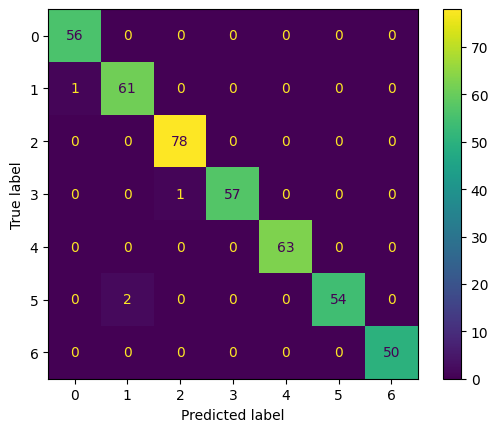

In [15]:
confusionMatrix = confusion_matrix(yTest, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
disp.plot()
plt.show()

##  **Save the model**

In [86]:
import os

# Define the folder name
folder_name = "models"

# Define the path to the folder
folder_path = "/kaggle/working/" + folder_name

# Create the folder
os.makedirs(folder_path)

print(f"Folder '{folder_name}' created successfully at {folder_path}")


Folder 'models' created successfully at /kaggle/working/models


In [17]:
import pickle

# Save the StackingClassifier model
with open('D:/College Stuff/Semester 6/Homework/Data Mining & Analysis/mlproject/models/new/staxifierV3.pkl', 'wb') as file:
    pickle.dump(staxifier, file)